In [10]:
# 모듈 불러오기
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tqdm import tqdm
import re
import joblib

In [5]:
senti=pd.read_csv('./data/knu_sentiment_lexicon.csv')
senti

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [6]:
nouns = pd.read_csv('./data/nouns_df.csv')
nouns = nouns[['명사']]
nouns

,명사
0,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생..."
1,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ..."
2,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민..."
3,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주..."
4,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '..."
...,...
39940,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰..."
39941,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',..."
39942,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브..."
39943,"['윤희', '경찰청장', '충북', '충주시', '중앙', '경찰', '학교', ..."


In [5]:
# 본문내용 안의 공백제거 코드 (명사만 뽑으면 돼서 안함)
# text = news['본문'][0]
# cleaned_text = re.sub(r'\s+', ' ', text)

## 머신러닝 (Multinomial Logistic Regression)
- 학습데이터 : 본문
- 타겟데이터 : 감성분석결과

In [7]:
# 감성사전
okt = Okt()

total_score = []
for i in tqdm(nouns['명사']):
    try:
        t = okt.normalize(i)
        score = 0
        for w,p in zip(senti['word'], senti['polarity']):
            score += t.count(w)*p
        total_score.append(score)

    except:
        total_score.append(None)

nouns['감성점수'] = total_score
nouns

100%|██████████| 39945/39945 [12:09<00:00, 54.74it/s]


,명사,감성점수
0,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생...",6
1,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ...",-3
2,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민...",9
3,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주...",14
4,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '...",12
...,...,...
39940,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰...",-7
39941,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',...",15
39942,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브...",-8
39943,"['윤희', '경찰청장', '충북', '충주시', '중앙', '경찰', '학교', ...",11


In [7]:
nouns['감성점수'].isna().sum()

0

-14.0

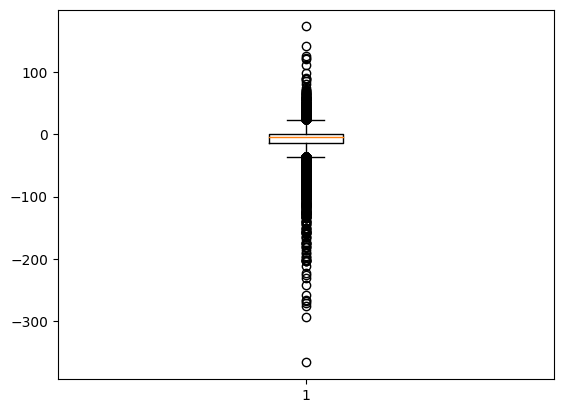

In [8]:
# 감성점수 분포 확인하기
import matplotlib.pyplot as plt

plt.boxplot(nouns['감성점수'])
nouns['감성점수'].quantile(q=0.25)  # 1 분위수

In [9]:
# 중앙값 확인
nouns['감성점수'].median()

-5.0

In [10]:
# 긍정
print((nouns['감성점수'] >= 1.0).value_counts())
print()

# 부정
print((nouns['감성점수'] <= -14.0).value_counts())
print()

# 중립
print(((nouns['감성점수'] > -14.0) & (nouns['감성점수'] < 1.0)).value_counts()) 

감성점수
False    28900
True     11045
Name: count, dtype: int64
감성점수
False    29855
True     10090
Name: count, dtype: int64
감성점수
False    21135
True     18810
Name: count, dtype: int64


In [15]:
# 긍정 : 1 / 중립 : 0 / 부정 : -1
nouns['감성분석결과'] = nouns['감성점수'].apply(lambda x: 1 if x>=1.0 else -1 if x<=-14.0 else 0) 
nouns[nouns['감성분석결과'] == 0]['감성분석결과'].value_counts()
nouns

# csv파일로 저장
nouns.to_csv('senti_result.csv', encoding='utf-8', index=False)

,명사,감성점수,감성분석결과
0,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생...",6,1
1,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ...",-3,0
2,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민...",9,1
3,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주...",14,1
4,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '...",12,1
...,...,...,...
39940,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰...",-7,0
39941,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',...",15,1
39942,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브...",-8,0
39943,"['윤희', '경찰청장', '충북', '충주시', '중앙', '경찰', '학교', ...",11,1


In [11]:
nouns = pd.read_csv('./senti_result.csv', encoding='utf-8')
nouns

,명사,감성점수,감성분석결과
0,"['이대성', '허웅', '제압', '성현', '점슛', '분전', '허웅', '생...",6,1
1,"['진박', '감별', '사가', '쥐락펴락', '나경원', '비판', '응수', ...",-3,0
2,"['양금', '국민', '의원', '대구', '북구', '대구', '북구', '주민...",9,1
3,"['김상훈', '국민', '의원', '대구', '서구', '대구', '서구', '주...",14,1
4,"['류성걸', '국민', '의원', '대구', '류성걸', '국민', '의원', '...",12,1
...,...,...,...
39940,"['우상혁', '부다페스트', '세계', '육상', '선수권', '남자', '높이뛰...",-7,0
39941,"['중소', '벤처기업', '실장', '전보', '중소기업', '정책', '실장',...",15,1
39942,"['유튜버', '김용호', '유튜브', '채널', '강용석', '나이트', '라이브...",-8,0
39943,"['윤희', '경찰청장', '충북', '충주시', '중앙', '경찰', '학교', ...",11,1


In [12]:
nouns['명사'][0].replace('[', '').replace(']', '').replace("'", '').replace(',', '')
nouns['명사'] = nouns['명사'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').replace(',', ''))
nouns

,명사,감성점수,감성분석결과
0,이대성 허웅 제압 성현 점슛 분전 허웅 생애 점슛 콘테스트 우승 반도 덩크슛 챔피언...,6,1
1,진박 감별 사가 쥐락펴락 나경원 비판 응수 국민 장제원 의원 나경원 의원 나경원 국...,-3,0
2,양금 국민 의원 대구 북구 대구 북구 주민 양금 국민 의원 중앙 정치 활동 긍정 평...,9,1
3,김상훈 국민 의원 대구 서구 대구 서구 주민 출신 김상훈 국민 의원 의정 활동 전반...,14,1
4,류성걸 국민 의원 대구 류성걸 국민 의원 전반 의정 활동 대한 대구 주민 평가 긍정...,12,1
...,...,...,...
39940,우상혁 부다페스트 세계 육상 선수권 남자 높이뛰기 예선 로이터 우상혁 부다페스트 세...,-7,0
39941,중소 벤처기업 실장 전보 중소기업 정책 실장 대희 상공 정책 실장 영준 국장 전보 ...,15,1
39942,유튜버 김용호 유튜브 채널 강용석 나이트 라이브 캡처 연예 출신 유튜버 김용호 조국...,-8,0
39943,윤희 경찰청장 충북 충주시 중앙 경찰 학교 신임 경찰 졸업식 신임 경찰 악수 최근 ...,11,1


#### 다항 로지스틱 회귀 모델

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 모델
from sklearn.linear_model import LogisticRegression # 다항 로지스틱 회귀모델
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

In [14]:
cv = CountVectorizer()
dtm = cv.fit_transform(nouns['명사'])
dtm.shape

(39945, 69496)

In [15]:
import pickle
pickle.dump(cv, open("model_cv.pb", mode="wb"))

In [16]:
# cv = pickle.load(open("model_cv.pb", mode="rb"))

In [17]:
cv.get_feature_names_out()

array(['가가', '가가린', '가가호호', ..., '힙합', '힙해', '힛집'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split

data = dtm
target = nouns['감성분석결과']

train_X, test_X, train_y, test_y = train_test_split(data, target, 
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=42)

In [8]:
train_X.shape

(31956, 69496)

In [9]:
# solver : 로지스틱 회귀 모델에서 사용되는 최적화 알고리즘을 지정하는 매개변수
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(train_X, train_y)
lr.score(test_X, test_y)

0.8253849042433345

In [10]:
pred_y = lr.predict(test_X)
pred_y

array([ 0,  0, -1, ...,  0,  0, -1], dtype=int64)

#### 모델 저장

In [15]:
joblib.dump(lr, 'model_machine_yn.pkl')

['model_machine_yn.pkl']

In [16]:
model = joblib.load('model_machine_yn.pkl')

#### 모델 성능평가

In [31]:
# 클래스 별 정밀도, 재현율, F1 점수 확인
from sklearn.metrics import classification_report

pred = lr.predict(test_X)

result = classification_report(test_y, pred)
print(result)


              precision    recall  f1-score   support

          -1       0.85      0.81      0.83      2018
           0       0.80      0.84      0.82      3762
           1       0.84      0.81      0.82      2209

    accuracy                           0.83      7989
   macro avg       0.83      0.82      0.83      7989
weighted avg       0.83      0.83      0.83      7989



In [32]:
# 전체 정확도 확인
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.8253849042433345

In [33]:
probabilities = model.predict_proba(test_X)
probabilities

array([[1.62440966e-03, 9.98372165e-01, 3.42502297e-06],
       [3.69338609e-03, 9.96301539e-01, 5.07509263e-06],
       [9.99777427e-01, 2.22573094e-04, 6.02085357e-18],
       ...,
       [1.02815312e-04, 7.11858829e-01, 2.88038356e-01],
       [1.53213022e-02, 9.84418377e-01, 2.60321136e-04],
       [9.99991039e-01, 8.96085152e-06, 1.21112508e-10]])

---

In [ ]:
# 그래프 추가할수있으면 하기

In [21]:
text = '''"엄마, 강아지는 어떻게 만들어?"

"강아지들을 철창에 가둬놓고 발정제 주사를 잔뜩 맞혀. 강제로 여러 차례 교배를 시키지. 임신한지 60일 정도가 지나면, 엄마 강아지의 배를 갈라 아기 강아지들을 꺼낸단다."

빨래를 개던 엄마가 아들의 질문에 친절히 답해준다. 이를 듣는 아이 표정이 점점 심각해진다.

/사진=위액트 유튜브 영상 &#039;사지않을개&#039; 캠페인, &#039;펫숍 강아지는 어디서 올까?&#039; 화면 캡쳐
/사진=위액트 유튜브 영상 '사지않을개' 캠페인, '펫숍 강아지는 어디서 올까?' 화면 캡쳐
"엄마 강아지의 배는 다시 꿰매주면 돼. 이미 여러번 그렇게 했거든. 태어난 새끼들은 죽지 않을만큼 굶겨. 그럼 아주 조그맣게 만들 수 있어. 정말 예쁘지? 강아지가 너무 크면 잘 팔리지 않거든."
/사진=위액트 유튜브 영상 &#039;사지않을개&#039; 캠페인, &#039;펫숍 강아지는 어디서 올까?&#039; 화면 캡쳐
/사진=위액트 유튜브 영상 '사지않을개' 캠페인, '펫숍 강아지는 어디서 올까?' 화면 캡쳐
엄마는 웃으며 말을 이어간다.

"그래서 새끼들 중에 제일 작은 강아지는 다시 철창에 가두어서 임신을 시키고, 나머지는 가게에 내다 파는 거란다."

이를 다 들은 아이 얼굴이 잔뜩 시무룩해진다. 집안에 있던 작고 하얀 반려견, 몰티즈를 새삼스레 바라본다.
/사진=위액트 유튜브 영상 &#039;사지않을개&#039; 캠페인, &#039;펫숍 강아지는 어디서 올까?&#039; 화면 캡쳐
/사진=위액트 유튜브 영상 '사지않을개' 캠페인, '펫숍 강아지는 어디서 올까?' 화면 캡쳐
아이는 마침내 울음을 터트린다. 분홍색 화면에 질문이 뜬다.

"펫숍 쇼윈도우에 진열된 귀여운 새끼 강아지들은 어디에서 오는 걸까요?"
지난 9월, 지옥 같은 번식장에서 발견된 강아지들./사진=위액트 인스타그램
지난 9월, 지옥 같은 번식장에서 발견된 강아지들./사진=위액트 인스타그램
동물구조단체 '위액트(WEACT)'의 캠페인이다. 올 한 해 누구보다 분주히 번식장 개들을 구조한 활동가들이, 진지하게 묻는다. 길을 가다 우연히 봤던 그 귀여운 강아지들. 예쁘다고 사진을 찍고 호기심에 데려오기도 했던 그 생명들.

그들이 대체 어디서 온 건지 아느냐고.
화성허가번식장에서 구조된 강아지./사진=위액트 인스타그램
화성허가번식장에서 구조된 강아지./사진=위액트 인스타그램
위액트 활동가들은 빠짐없이 봤다. 현실이 캠페인보다 1만배 이상은 더 '지옥'이란 걸. 냉동고에선 신문지에 싸인 사체 90여구가 수두룩하게 쏟아졌다. 그 강아지 삶은 어땠을까.
화성허가번식장에서 구조된 강아지. 제왕절개를 해서 새끼를 빼낸 뒤 배를 꿰맨 흔적들./사진=위액트 인스타그램
화성허가번식장에서 구조된 강아지. 제왕절개를 해서 새끼를 빼낸 뒤 배를 꿰맨 흔적들./사진=위액트 인스타그램
출산, 교배, 제왕절개, 다시 출산, 교배, 제왕절개. 또 출산, 교배, 제왕절개. 사람들이 좋아하는 크기의 강아지를 만들기 위해, 작은 지옥에 갇힌 채 평생을 그렇게 살다 죽은 거였다. 잇몸은 무너지고 치아는 뿌리까지 썩었으며 귀는 진드기로 가득 차 있었다. 눈은 궤양과 백내장으로 뿌얬다. 여기에 저혈당에, 탈수에, 얼굴엔 구멍까지 뚫려 있었다.
화성허가번식장에서 신문지에 싸여 발견된, 차갑게 굳어버린 새끼 강아지들의 사체./사진=위액트 인스타그램
화성허가번식장에서 신문지에 싸여 발견된, 차갑게 굳어버린 새끼 강아지들의 사체./사진=위액트 인스타그램
올해 9월, 화성 허가 번식장에서 구한 1426마리. 1킬로가 남짓한, 자기 몸도 못 가누는, 쉬지 않고 교미 행동까지 하는 개들도 있었다. 그 달부터 현재까지 위액트 SNS엔 쉼없이 구한 개들의 가족을 찾는 글들이 올라왔다. 로사, 모리, 애시, 단테, 로잘린, 베니, 소다, 린넨, 스캇….
화성허가번식장에서 구조된 강아지./사진=위액트 인스타그램
화성허가번식장에서 구조된 강아지./사진=위액트 인스타그램
끝도 없이 구하고 또 구해도 부딪히는 '한계'. 근본적인 깨달음은 늘 이렇다. 수요가 있으면 공급이, 이 지옥이 절대 끝나지 않는단 것. 그래서 캠페인을 만들었단다. 영상은 평범하지 않다. 고민한 흔적이 엿보인다. 그럴 수밖에 없다. 더 많이 보게하고 싶은 거다. 좋은 반응들이 쏟아졌다.
화성허가번식장에서 발견된 강아지들./사진=위액트 인스타그램
화성허가번식장에서 발견된 강아지들./사진=위액트 인스타그램
"이렇게 만들어지는지 정말 몰랐습니다. 마음 아파요. 미안하기도 합니다."
한쪽에선 구하고 치료해주고, 그 삶이 다가 아니라고 이리 애달프게 가장 예쁜 모습을 담아 입양 홍보를 하고, 다른 한쪽에선 아무렇잖게 펫숍에서 다시 아주 작은 강아지들을 산다. 그 수요가 있는 한 끝나지 않는 악순환이다./사진=위액트 인스타그램
한쪽에선 구하고 치료해주고, 그 삶이 다가 아니라고 이리 애달프게 가장 예쁜 모습을 담아 입양 홍보를 하고, 다른 한쪽에선 아무렇잖게 펫숍에서 다시 아주 작은 강아지들을 산다. 그 수요가 있는 한 끝나지 않는 악순환이다./사진=위액트 인스타그램
기억에 각인된, 위액트의 캠페인이 또 있었다. 잔혹하고도 슬픈.

백만원에 펫숍에서 팔린 비숑이 의아해한다. 이상하다고.
/사진=위액트 인스타그램
/사진=위액트 인스타그램
"자꾸 나한테 밥도, 간식도 많이 주는 거 있지? 내가 태어난 곳에선 밥을 아주 조금씩만 줬는데. 분명 밥을 조금 먹어야 크기가 작아질 수 있다고, 그래야 더 많이 사랑 받을 수 있다고 했는데."
'''

In [22]:
text

'"엄마, 강아지는 어떻게 만들어?"\n\n"강아지들을 철창에 가둬놓고 발정제 주사를 잔뜩 맞혀. 강제로 여러 차례 교배를 시키지. 임신한지 60일 정도가 지나면, 엄마 강아지의 배를 갈라 아기 강아지들을 꺼낸단다."\n\n빨래를 개던 엄마가 아들의 질문에 친절히 답해준다. 이를 듣는 아이 표정이 점점 심각해진다.\n\n/사진=위액트 유튜브 영상 &#039;사지않을개&#039; 캠페인, &#039;펫숍 강아지는 어디서 올까?&#039; 화면 캡쳐\n/사진=위액트 유튜브 영상 \'사지않을개\' 캠페인, \'펫숍 강아지는 어디서 올까?\' 화면 캡쳐\n"엄마 강아지의 배는 다시 꿰매주면 돼. 이미 여러번 그렇게 했거든. 태어난 새끼들은 죽지 않을만큼 굶겨. 그럼 아주 조그맣게 만들 수 있어. 정말 예쁘지? 강아지가 너무 크면 잘 팔리지 않거든."\n/사진=위액트 유튜브 영상 &#039;사지않을개&#039; 캠페인, &#039;펫숍 강아지는 어디서 올까?&#039; 화면 캡쳐\n/사진=위액트 유튜브 영상 \'사지않을개\' 캠페인, \'펫숍 강아지는 어디서 올까?\' 화면 캡쳐\n엄마는 웃으며 말을 이어간다.\n\n"그래서 새끼들 중에 제일 작은 강아지는 다시 철창에 가두어서 임신을 시키고, 나머지는 가게에 내다 파는 거란다."\n\n이를 다 들은 아이 얼굴이 잔뜩 시무룩해진다. 집안에 있던 작고 하얀 반려견, 몰티즈를 새삼스레 바라본다.\n/사진=위액트 유튜브 영상 &#039;사지않을개&#039; 캠페인, &#039;펫숍 강아지는 어디서 올까?&#039; 화면 캡쳐\n/사진=위액트 유튜브 영상 \'사지않을개\' 캠페인, \'펫숍 강아지는 어디서 올까?\' 화면 캡쳐\n아이는 마침내 울음을 터트린다. 분홍색 화면에 질문이 뜬다.\n\n"펫숍 쇼윈도우에 진열된 귀여운 새끼 강아지들은 어디에서 오는 걸까요?"\n지난 9월, 지옥 같은 번식장에서 발견된 강아지들./사진=위액트 인스타그램\n지난 9월, 지옥 같은 번식장에서 발견된 강아지들./사진=위액트 인스타그램\n동물구조

In [23]:
from konlpy.tag import Okt  # 형태소 분석기로 Okt를 사용합니다.

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 문장에서 명사만 추출하여 리스트로 반환
new_nouns = okt.nouns(text)

new_nouns

['엄마',
 '강아지',
 '강아지',
 '철창',
 '발정',
 '제',
 '주사',
 '잔뜩',
 '강제',
 '여러',
 '차례',
 '교배',
 '임신',
 '한지',
 '정도',
 '엄마',
 '강아지',
 '배',
 '갈라',
 '아기',
 '강아지',
 '빨래',
 '엄마',
 '아들',
 '질문',
 '답',
 '아이',
 '표정',
 '점점',
 '사진',
 '위액',
 '트',
 '유튜브',
 '영상',
 '사지',
 '개',
 '캠페인',
 '펫숍',
 '강아지',
 '화면',
 '캡쳐',
 '사진',
 '위액',
 '트',
 '유튜브',
 '영상',
 '사지',
 '개',
 '캠페인',
 '펫숍',
 '강아지',
 '화면',
 '캡쳐',
 '엄마',
 '강아지',
 '다시',
 '번',
 '새끼',
 '죽지',
 '겨',
 '아주',
 '수',
 '정말',
 '강아지',
 '리지',
 '사진',
 '위액',
 '트',
 '유튜브',
 '영상',
 '사지',
 '개',
 '캠페인',
 '펫숍',
 '강아지',
 '화면',
 '캡쳐',
 '사진',
 '위액',
 '트',
 '유튜브',
 '영상',
 '사지',
 '개',
 '캠페인',
 '펫숍',
 '강아지',
 '화면',
 '캡쳐',
 '엄마',
 '말',
 '간다',
 '새끼',
 '중',
 '제일',
 '강아지',
 '다시',
 '철창',
 '임신',
 '나머지',
 '가게',
 '거란',
 '아이',
 '얼굴',
 '잔뜩',
 '집안',
 '작고',
 '반려견',
 '몰티즈',
 '스레',
 '사진',
 '위액',
 '트',
 '유튜브',
 '영상',
 '사지',
 '개',
 '캠페인',
 '펫숍',
 '강아지',
 '화면',
 '캡쳐',
 '사진',
 '위액',
 '트',
 '유튜브',
 '영상',
 '사지',
 '개',
 '캠페인',
 '펫숍',
 '강아지',
 '화면',
 '캡쳐',
 '아이',
 '마침내',
 '울음',
 '터트',
 '린다',
 '분홍색',
 '화면',
 '질

In [24]:
# 새로운 데이터를 CountVectorizer로 변환
cv2 = CountVectorizer(vocabulary=cv.vocabulary_)  # vectorizer는 모델을 훈련할 때 사용한 CountVectorizer 객체
dtm = cv2.fit_transform([' '.join(new_nouns)])

# 모델에 입력하여 예측
predicted_label = model.predict(dtm)

In [25]:
predicted_label

array([-1], dtype=int64)

In [26]:
sentiment = '긍정' if predicted_label == 1 \
    else ('부정' if predicted_label == -1 else '중립')
print(f'예측 감성: {sentiment}')                       

예측 감성: 부정
